## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [1]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [2]:
# create dataframe from the given csv file
df =  pd.read_csv("LoanStatus.csv")

# get statistical analysis of numeric data in the df
df.describe()

# to use describe on specific columns, lets say ApplicantIncome and LoanAmount
columns = ["ApplicantIncome", "LoanAmount"]
statistical_description = df[columns].describe()
statistical_description

,ApplicantIncome,LoanAmount
count,614.000000,592.000000
mean,5403.459283,146.412162
std,6109.041673,85.587325
min,150.000000,9.000000
25%,2877.500000,100.000000
50%,3812.500000,128.000000
75%,5795.000000,168.000000
max,81000.000000,700.000000


In [3]:
# count null values in each column using isnull and sum
df.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [4]:
# to calculate the probability first we need to find how many loans have been given out in total
# and also find how many of them were denied and how many approved
# then devide each one of them by the total amount of given loan

# to calculate total amount of loans
total_loans = len(df)

# approved and denied loans
approved_loans = (df['Loan_Status'] == 'Y').sum()
denied_loans = (df['Loan_Status'] == 'N').sum()

# divide each one of them by the total amount
probability_approved = approved_loans / total_loans
probability_denied = denied_loans / total_loans

# final propabilities
print("probability of approving:", probability_approved)
print("probability of denying:", probability_denied)

probability of approving: 0.6872964169381107
probability of denying: 0.3127035830618892


In [5]:
# to calculate a probability of getting a loan when a client has good loan history
# first count the total amount of loans that were approved
# calculate number of client with credit hisotry 1

# df of those clients with good credit history
good_credit_history = df[df['Credit_History'] == 1]
total_good_credit_clients = len(good_credit_history)

# number of approved credits
approved_loans_good_credit = (good_credit_history['Loan_Status'] == 'Y').sum()

# probability
probability = approved_loans_good_credit / total_good_credit_clients

print('getting a loan approved with good credit history has probability: ', probability)

getting a loan approved with good credit history has probability:  0.7957894736842105


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

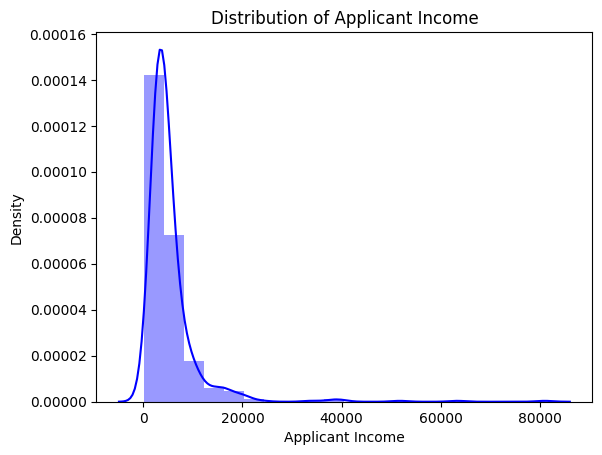

In [18]:
# distribution plot of applicatnIncome
sns.distplot(df['ApplicantIncome'], bins=20, kde=True, color='blue')

# labels
plt.xlabel('Applicant Income')
plt.ylabel('Density')
plt.title('Distribution of Applicant Income')

plt.show()


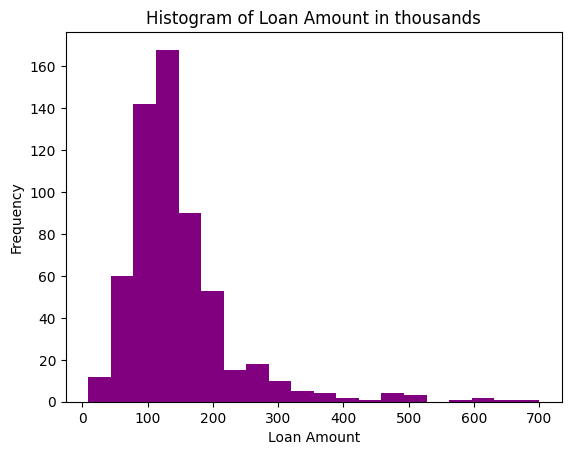

In [25]:
# there are some null values in LoanAmmount, drop them
loan_amount_data = df['LoanAmount'].dropna()

# use 20 bins
plt.hist(loan_amount_data, bins=20, color='purple')

# labels
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount in thousands')

plt.show()

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [8]:
from scipy.stats import norm

In [6]:
# since we want percentage of clients less then 2000 
threshold = 2000

# calcualte two needed aparameters for norm.cdf() function, mean and std
mean_income = df['ApplicantIncome'].mean()
std_dev_income = df['ApplicantIncome'].std()

# use norm.cdf and multiply by 100 to get percentage
less_then_2000 = norm.cdf(threshold, mean_income, std_dev_income) * 100

# round 
less_then_2000 = round(less_then_2000, 3)

print(f'{less_then_2000} % of clients have less then {threshold} income')

28.872 % of clients have less then 2000 income


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

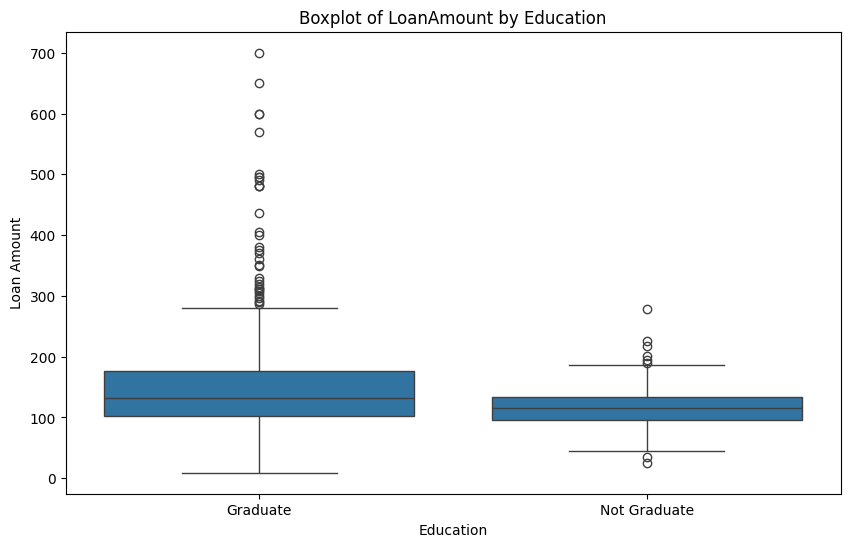

In [11]:
# box plot for loan amount based on clients education (Graduate or Not graduate)

plt.figure(figsize=(10, 6))

sns.boxplot(x='Education', y='LoanAmount', data=df)

# labels
plt.title('Boxplot of LoanAmount by Education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')

plt.show()

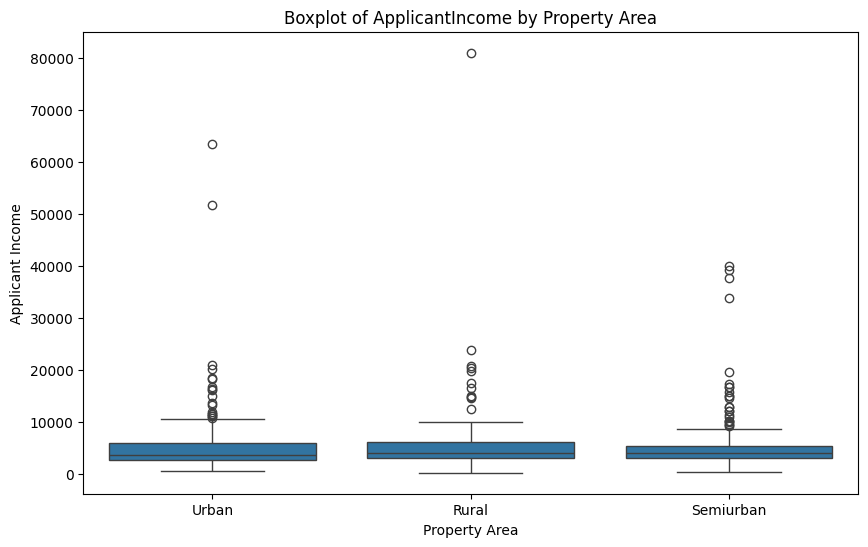

In [12]:
# box plot of ApplicantIncome based on their living area (Urban, Rural or Semiurban)
plt.figure(figsize=(10, 6))

sns.boxplot(x='Property_Area', y='ApplicantIncome', data=df)

plt.title('Boxplot of ApplicantIncome by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Applicant Income')

plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [13]:
from scipy.stats import ttest_1samp,ttest_ind

In [17]:

treshold = 150  # check if average of column is significantly different from 150

# Perform one-sample t-test on a column (e.g., ApplicantIncome)
column_to_test = df['ApplicantIncome']
t_statistic, p_value = ttest_1samp(column_to_test, treshold)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The mean is significantly different from", treshold)
else:
    print("The mean is not significantly different from", treshold)

# from the given test, we find out that the average value of ApplicantIncome is significantluy different 150

The mean is significantly different from 150


In [42]:
# Select two samples for the two-sample t-test (e.g., ApplicantIncome for two different groups)
sample1 = df[df['Education'] == 'Graduate']['ApplicantIncome']
sample2 = df[df['Education'] == 'Not Graduate']['ApplicantIncome']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(sample1, sample2)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): The means of the two groups are significantly different")
else:
    print("Fail to reject Null Hypothesis (H0): The means of the two groups are not significantly different")

Reject Null Hypothesis (H0): The means of the two groups are significantly different
